# First script inversion of the ZNS parameters

Thanks to this script we will carry out an inversion of the parameters of the unsaturated area, the porosity and the depth of the water table in steady state from a reference simulation sampled in 100 points. The heat transfer takes place in a one-dimensional soil of height 1m represented. 

The inversion will focus on the four uncertain parameters and one boundary condition of this model, namely:

- the porosity $n$
- the alpha Van Genuchten parameter $\alpha$,
- the $n$ Van Genuchten parameter, 
- the residual saturation $s_wres$, and
- the water table altitude (WT).


Fill the E_temperature_initiale.dat with the initial temperature profile





# O. Initiation Ginbette files

In [11]:
#!/usr/bin/env python

import os
import numpy as np
from pathlib import Path
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display
import subprocess
import itertools
libs_gfortran = ['gfortran']
# please compile ginette in the folder 1D_col
# path of the 1D_col directory
os.chdir('/home/ariviere/Programmes/ginette/application/ZNS_rain/')
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

#-----------------------------------------------------------------
# Compile ginette
if os.path.isfile('ginette'):
    print ("ginette exist")
else:
    print ("ginette not exist")
    print("you must compile ginette in the current directory")
    print(" gfortran -o ginette ../../src/ginette_V2.f")
    subprocess.call(["gfortran","-o","ginette","../../src/ginette_V2.f"])  #creat

#-----------------------------------------------------------------
########### Setup of the model

#time step in s
dt=900
#duration of the simulation in days
nb_day=2

# state
## 0 steady state
# 1 transient state (dynamic state)
state=1

# altitude column top in meter
z_top=0
#altitude column bottom in meter
z_bottom=-3
az=abs(z_top-z_bottom)
#discretisation : size cell in meter
dz=0.01

#apply unsaturated flow and thermal 
#unsat =1 apply
#unsat=0 cancel unsaturated zone
unsat=1

# number of facies in the column. If nb_zone=1 homognous porous media
nb_zone=1

# number of cell
nb_cell=z_top/dz






#Observation positions00 0.50000
#Observation in meter
Obs1=z_top-0.025
Obs2=z_top-0.05
Obs3=z_top-0.1
Obs4=z_top-0.2
Obs5=z_top-0.3
Obs6=z_top-0.5
Obs7=z_top-0.7
Obs8=z_top-1
Obs9=z_top-1.5
Obs10=z_bottom



## write the parameters
nb_cell=abs(z_top-z_bottom)/dz
cell1=-Obs1/dz
cell2=-Obs2/dz
cell3=-Obs3/dz
cell4=-Obs4/dz
cell5=-Obs5/dz
cell6=-Obs6/dz
cell7=-Obs7/dz
cell8=-Obs8/dz
cell9=-Obs9/dz
cell10=-Obs10/dz


temp1=9.7
temp2=9.42
temp3=9.45
temp4=9.86
temp5=10.06
temp6=10.72
temp7=11.13
temp8=12.29
temp9=12.68
temp10=13.44



#-----------------------------------------------------------------
## write the setup of the moddeled domain
f_param_bck=open("E_parametre_backup.dat", "r")
f_param_new = open("E_parametre.dat", 'w')
setup_model=f_param_bck.read()
setup_model=setup_model.replace('[cell1]','%05d' % cell1)
setup_model=setup_model.replace('[cell2]','%05d' % cell2)
setup_model=setup_model.replace('[cell3]','%05d' % cell3)
setup_model=setup_model.replace('[cell4]','%05d' % cell4)
setup_model=setup_model.replace('[cell5]','%05d' % cell5)
setup_model=setup_model.replace('[cell6]','%05d' % cell6)
setup_model=setup_model.replace('[cell7]','%05d' % cell7)
setup_model=setup_model.replace('[cell8]','%05d' % cell8)
setup_model=setup_model.replace('[cell9]','%05d' % cell9)
setup_model=setup_model.replace('[cell10]','%05d' % cell10)


setup_model=setup_model.replace('[dt]','%06.0fD+00' % dt)
setup_model=setup_model.replace('[state]','%1i' % state)
setup_model=setup_model.replace('[nb_day]','%06.0f' % nb_day)
setup_model=setup_model.replace('[z_top]', '%7.3e' % z_top)
setup_model=setup_model.replace('[z_bottom]', '%7.3e' % z_bottom)
setup_model=setup_model.replace('[az]','%7.3e' % az)
setup_model=setup_model.replace('[dz]','%6.2e' % dz)
setup_model=setup_model.replace('[nb_cell]','%05.0f' % nb_cell)
setup_model=setup_model.replace('[unsat]','%1i' % unsat)

f_param_new.write(setup_model)
f_param_bck.close()
f_param_new.close()



Current working directory: /home/ariviere/Programmes/ginette/application/ZNS_rain
ginette exist




## 1. Reference simulation and sampling

We choose to use the average parameters given by Carsel and Parrish (1988) as reference values for all facies


In [12]:
import numpy as np
import pandas as pd
import array


# Boundary condition water level (meter)
REF_WT=-1.0



# Initial conditions
f_IC_bck=open("E_cdt_initiale_backup.dat","r")

f_IC_new=open("E_cdt_initiale.dat","w")
IC_model=f_IC_bck.read()
IC_model=IC_model.replace('[head_ini]', '%05.2fD+00' % REF_WT)


#interpolation initial temperature 

z=np.arange(z_bottom+dz/2,z_top,dz)

z=-np.sort(-z)
import matplotlib.pyplot as plt
from scipy import interpolate
z_obs = np.array([Obs1,Obs2,Obs3,Obs4,Obs5,Obs6,Obs7,Obs8,Obs9,Obs10])
t = np.array([temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9,temp10])
temp_ini_o = interpolate.interp1d(z_obs, t,fill_value='extrapolate',kind='linear')
temp_ini=pd.DataFrame(temp_ini_o(z))
temp_ini.to_csv('E_temperature_initiale.dat', header=None,index=None)

f_IC_new.write(IC_model) 
## write the boundary conditions
f_bc_bck=open("E_cdt_aux_limites_backup.dat", "r")
f_bc_new = open("E_cdt_aux_limites.dat", 'w')
bc_model=f_bc_bck.read()
bc_model=bc_model.replace('[top]', '%08.2fD+00' % REF_WT)
bc_model=bc_model.replace('[bot]','%08.2fD+00' % REF_WT)
f_bc_new.write(bc_model) 


    ########### Zone of parameters
f_coor=open("E_coordonnee.dat", "w")
f_zone=open("E_zone.dat", 'w')
#zonation spatial des parameters

coord=pd.DataFrame()   
# calculate the coordinates to know the number of cell in the domain    
zvalues = z;
xvalues = np.array([0.5]);
zz, xx = np.meshgrid(zvalues, xvalues)
NT = np.product(zz.shape)
data = {
    "x": np.reshape(xx,NT),
    "z": np.reshape(zz,NT)}
coord = pd.DataFrame(data=data)
coord['id']=coord.index.values.astype(int)
coord['id']=coord['id']+1
cols = coord.columns.tolist()
cols = cols[-1:] + cols[:-1]
coord = coord[cols] 
coord.to_csv(f_coor, index = False, sep=' ', header=False)
#zone parameter by cell ((homogenous domain = 1 zone))
coord['zone'] =1

coord.zone.to_csv(f_zone, index = False, header=False)


   
f_zone.close()
f_IC_new.close()
f_bc_bck.close()
f_bc_new.close()
f_coor.close()

In [13]:
#-----------------------------------------------------------------
# constant parameters
## intrinsic permeability [m2]  k=K*mu/(rho*g)
## K hydraulic conductivity [m.s-1]
## mu viscosity [Pa.s]
## rho density [kg.m-3]
## g gravity  9.81 [m2.s-1]
val_k=4e-15
# solid grain density rho_s=val_r  [kg.m-3]
val_r=2578

# porosity
REF_n=0.10 # \Phi

# Van Genuchten parameters
REF_a=1.50000 #m-1 alpha_vg
REF_nVG= 1.80  # n_vg
REF_swres=0.10 # S_wr

# Heat capacity is calculated  by the following relationship
#  c_pm= c_w r_w n  * sat+ c_s r (1-n) + c_a r_a n * (1-sat)
# density
# c_s solid specific heat capacity
#val_c= c_s m2/s2/C I advice to let this value constant.
# There are no way to calibrate the both parameter rho and c in the same time.
#c_w=4185D+00	       m2/s2/C
#r_w=1000  kg/m3
# solid density r=val_r 


f_paramZ_bck=open("E_zone_parameter_backup.dat", "r")
f_paramZ_new = open("E_zone_parameter.dat", 'w')
param_zone=f_paramZ_bck.read()



# replace the parameter values
param_zone=param_zone.replace('[k1]','%8.2e' % val_k)
param_zone=param_zone.replace('[n1]','%6.2f' % REF_n)
param_zone=param_zone.replace('[r1]','%6.2f' % val_r)
param_zone=param_zone.replace('[a1]','%8.2e' % REF_a)
param_zone=param_zone.replace('[nVG1]','%6.2f' % REF_nVG)
param_zone=param_zone.replace('[swres1]','%6.2f' % REF_swres)
    




#Write new ginette files

f_paramZ_new.write(param_zone)


# close files    

f_paramZ_new.close()
f_paramZ_bck.close()




# run ginette
subprocess.call(["./ginette"])
    

At line 1973 of file ../../src/ginette_V2.f (unit = 242, file = 'E_pression_initiale.dat')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x70d379c23960 in ???
#1  0x70d379c244d9 in ???
#2  0x70d379c2510f in ???
#3  0x70d379e7817b in ???
#4  0x70d379e71684 in ???
#5  0x70d379e722aa in ???
#6  0x643bc2e45cb9 in ???
#7  0x643bc2e66ce3 in ???
#8  0x70d379829d8f in __libc_start_call_main
	at ../sysdeps/nptl/libc_start_call_main.h:58
#9  0x70d379829e3f in __libc_start_main_impl
	at ../csu/libc-start.c:392
#10  0x643bc2e06264 in ???
#11  0xffffffffffffffff in ???


2

# Profile saturation référence au bout de 2 jours

In [14]:
# read the saturation profil   
saturation_profile_REF = pd.read_table('S_saturation_profil_t.dat',delim_whitespace=True,header=None)
saturation_profile_REF.columns=[ "time",  "z","sat"]
saturation_profile_REF=saturation_profile_REF.iloc[saturation_profile_REF.index.stop-int(nb_cell):saturation_profile_REF.index.stop]
saturation_profile_REF

FileNotFoundError: [Errno 2] No such file or directory: 'S_saturation_profil_t.dat'

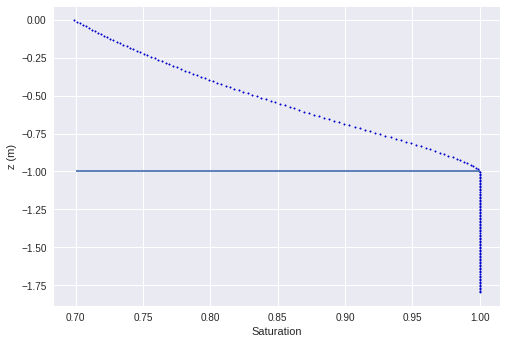

In [254]:
plt.figure()
plt.style.use('seaborn')

plt.scatter(saturation_profile_REF.sat,saturation_profile_REF.z, s=10, alpha=1, color='mediumblue',marker='.')
plt.hlines(y=-1,xmin=0.7,xmax=1)
plt.xlabel('Saturation')
plt.xlabel('Saturation')
plt.ylabel('z (m)')
plt.show()

 # Profile de temperature au bout de 2 jours

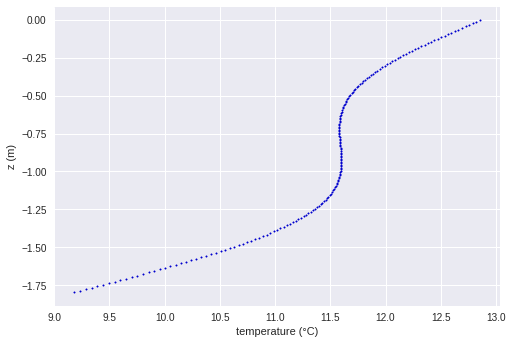

In [ ]:
# read the temperature profile   
temperature_profile_REF = pd.read_table('Sim_temperature_profil_t.dat',delim_whitespace=True,header=None)
temperature_profile_REF.columns=[ "time",  "z","temp"]
temperature_profile_REF=temperature_profile_REF.iloc[temperature_profile_REF.index.stop-int(nb_cell):temperature_profile_REF.index.stop]

plt.figure()
plt.style.use('seaborn')

plt.scatter(temperature_profile_REF.temp,temperature_profile_REF.z, s=10, alpha=1, color='mediumblue',marker='.')
plt.xlabel('temperature (°C)')
plt.ylabel('z (m)')
plt.show()


# Advectif fluxes


#' Plots advective fluxes timeseries
library(ggplot2)
library(reshape2)
library(akima)
path_output <-'/home/ariviere/Programmes/ginette/application/mini-LOMOS/GINETTE_SENSI/OUTPUT/'
path_plot <- "./"

sim_name=1


setwd(path_plot)
D_sim<-read.table(paste0(path_output,"Sim_heat_flux_profil_t_",sim_name,".dat"),header = FALSE)

#interpolation
x=D_sim[,1]/86400
y=D_sim[,2]
z=D_sim[,4]
fld <- with(D_sim, interp(x = x, y = y, z = z))


# prepare data in long format
D_sim <- melt(fld$z, na.rm = TRUE)
names(D_sim) <- c("x", "y", "advection")
D_sim$time <- fld$x[D_sim$x]
D_sim$depth <- fld$y[D_sim$y]
bl <- colorRampPalette(c("lightskyblue","royalblue","navy"))(200)                      
re <- colorRampPalette(c("darkred", "red2","mistyrose"))(200)
p <- ggplot(data = D_sim, aes(x = time, y = depth, z = advection)) +
  geom_tile(aes(fill = advection)) +
  stat_contour(colour = "black") +
  xlab("Time (days)") +
  ylab("Depth (m)") +
  scale_fill_gradientn(colours=c(re,"white", bl), na.value = "grey98",
                       limits = range(pretty(c(min(fld$z), max(fld$z)))),breaks=pretty(c(min(fld$z), max(fld$z))))  +                              
  theme_bw()+
  theme(legend.title = element_text(size = 15),
        legend.text = element_text(size = 10)) 
p
ggsave("advective_fluxes.png", plot = p, width = 11, height = 8)


# Flux conductifs

#' Plots conductive fluxes timeseries

library(ggplot2)
library(reshape2)
library(akima)
path_output <-'/home/ariviere/Programmes/ginette/application/mini-LOMOS/GINETTE_SENSI/OUTPUT/'
path_plot <- "./"

sim_name=1


setwd(path_plot)
D_sim<-read.table(paste0(path_output,"Sim_heat_flux_profil_t_",sim_name,".dat"),header = FALSE)

#interpolation
 x=D_sim[,1]/86400
y=D_sim[,2]
z=D_sim[,3]
fld <- with(D_sim, interp(x = x, y = y, z = z))


# prepare data in long format
D_sim <- melt(fld$z, na.rm = TRUE)
names(D_sim) <- c("x", "y", "conduction")
D_sim$time <- fld$x[D_sim$x]
D_sim$depth <- fld$y[D_sim$y]
bl <- colorRampPalette(c("lightskyblue","royalblue","navy"))(200)                      
re <- colorRampPalette(c("darkred", "red2","mistyrose"))(200)
p <- ggplot(data = D_sim, aes(x = time, y = depth, z = conduction)) +
  geom_tile(aes(fill = conduction)) +
  stat_contour(colour = "black") +
  xlab("Time (days)") +
  ylab("Depth (m)") +
  scale_fill_gradientn(colours=c(re,"white", bl), na.value = "grey98",
 limits = range(pretty(c(min(fld$z), max(fld$z)))),breaks=pretty(c(min(fld$z), max(fld$z))))   +                              
  theme_bw()+
  theme(legend.title = element_text(size = 15),
        legend.text = element_text(size = 10)) 
p

ggsave("conductive_fluxes.png", plot = p, width = 11, height = 8)


# tempereature profile with time

#' Plots temperature profile timeseries

library(ggplot2)
library(reshape2)
library(akima)

path_output <- '/home/ariviere/Programmes/ginette/application/mini-LOMOS/GINETTE_SENSI/OUTPUT/'
 path_plot <- "./"

sim_name=1

# 
# setwd(path_plot)
D_sim<-read.table(paste0(path_output,"Sim_temperature_profil_t_",sim_name,".dat"),header = FALSE)

#interpolation
x=D_sim[,1]/86400
y=D_sim[,2]
z=D_sim[,3]
fld <- with(D_sim, interp(x = x, y = y, z = z))


# prepare data in long format
D_sim <- reshape2 ::melt(fld$z, na.rm = TRUE)
names(D_sim) <- c("x", "y", "temperature")
D_sim$time <- fld$x[D_sim$x]
D_sim$depth <- fld$y[D_sim$y]

p <- ggplot(data = D_sim, aes(x = time, y = depth, z = temperature)) +
  geom_tile(aes(fill = temperature))+
  stat_contour(colour = "grey")  +
  xlab("Time (days)") +
  ylab("Depth (m)") +
  scale_fill_distiller(palette = "Spectral",name = "Temperature (Â°C)") +
  theme_bw()+
  theme(legend.title = element_text(size = 15),
        legend.text = element_text(size = 10))
p

ggsave("./temperature_profile.png", plot = p, width = 11, height = 8)


#library(directlabels)
#direct.label(p, list("far.from.others.borders", "calc.boxes", "enlarge.box", 
#                     hjust = 1, vjust = 1, box.color = NA, fill = "transparent", "draw.rects"))

## comparaison obs sim

#set wd to source file location
setwd("./")

library(hydroGOF)
library(stringr)
library(plyr)

path_obs <- "GINETTE_SENSI/OBS/"
path_output <- "GINETTE_SENSI/OUTPUT/"

files_obs <- list.files(path = path_obs, pattern = 'Obs')
files_output <- list.files(path = path_output, pattern = 'temperature_maille')

nb_PT100 <- length(files_obs)
num_PT100 <- substr(files_obs, 23, 23)

pos_end = str_locate(files_output, ".dat")
pos_bg = str_locate(files_output, "Sim_temperature_maille")
id_sim = as.numeric(str_sub(files_output, pos_bg[, 2] + 3,  pos_end[, 1] - 1))
nb_simu <- as.integer(max(id_sim))
param_simu <- read.table(file = "GINETTE_SENSI/tested_values", sep = " ", header = FALSE)

#Read data

for (i in seq_len(nb_PT100))  { 
  a <- read.csv(paste0(path_obs, files_obs)[i], sep=" ", header = FALSE)
  name <- str_remove(files_obs[i], ".dat")
  assign(name, a)
}

for (i in seq_len(nb_PT100*nb_simu))  { 
  a <- read.csv(paste0(path_output, files_output)[i], sep = " ", header = FALSE)
  name <- str_remove(files_output[i], ".dat")
  assign(name, a)
}

#Creation of a data-frame with all the observed temperatures

data_obs <- Obs_temperature_maille1_t[1]

for (j in seq_len(nb_PT100)) {
    a <- get(paste0("Obs_temperature_maille",j,"_t"))[2]
    data_obs <- cbind(data_obs, a)
}

#Creation of a data-frame with all the simulated temperatures

data_output <- Sim_temperature_maille1_1[1]

for (i in seq_len(nb_simu)) {
  for (j in seq_len(nb_PT100)) {
  a <- get(paste0(paste0("Sim_temperature_maille",j,"_"),i))[2]
  data_output <- cbind(data_output, a)
  }
}

#Creation of the matrix of the stats results of comparisons obs with sim
results <- array(NA, dim = c(nb_simu, 5*nb_PT100+1))

#name of rows
rows <- as.character(rep(0, nb_simu))

if (length(param_simu)>4) {
  for (i in seq_len(nb_simu)) {
    rows[i] <- paste0("Simu", i, " ", 
                      "k1=", param_simu[i, 1],
                      " k2=", param_simu[i, 5],
                      " n1=", param_simu[i, 2],
                      " n2=", param_simu[i, 6],
                      " l1=", param_simu[i, 3],
                      " l2=", param_simu[i, 7],
                      " r1=", param_simu[i, 4],
                      " r2=", param_simu[i, 8])
  }} else {
    for (i in seq_len(nb_simu)) {
      rows[i] <- paste0("Simu", i, " ", 
                        "k=", param_simu[i, 1],
                        " n=", param_simu[i, 2],
                        " l=", param_simu[i, 3],
                        " r=", param_simu[i, 4])
    }
  }


rownames(results) <- rows

#name of columns
columns <- as.character(c())
columns[1] <- "Sum KGE"
for (i in seq_len(nb_PT100)) {
  columns[i+1] <- paste0("KGE m", num_PT100[i])
  columns[i+1+as.integer(num_PT100[length(num_PT100)])] <- paste0("RMSE m", num_PT100[i])
  columns[i+1+2*as.integer(num_PT100[length(num_PT100)])] <- paste0("MAE m", num_PT100[i])
  columns[i+1+3*as.integer(num_PT100[length(num_PT100)])] <- paste0("COR m", num_PT100[i])
  columns[i+1+4*as.integer(num_PT100[length(num_PT100)])] <- paste0("PBIAS m", num_PT100[i])
}
colnames(results) <- columns

#verification : sim and obs time-series must have the same length !

if (length(data_output[, 1]) != length(data_obs[, 1])) {
  data_obs <- data_obs[-length(data_obs[, 1]), ]
}

#Fill the matrix
for (i in seq_len(nb_PT100)) {
  if (nb_PT100 == 3) {
    if (nb_simu==1) {
      a <- c(0, 3)
    } else {
      a <- seq(0, (nb_simu - 1) * 3, by = 3)
    }
  } else if (nb_PT100 == 2) {
    if (nb_simu==1) {
      a <- c(0, 2)
    } else {
      a <- seq(0, (nb_simu - 1) * 2, by = 2)
    }
  } else {
    if (nb_simu==1) {
      a <- c(0, 1)
    } else {
      a <- seq(0, (nb_simu - 1) * 1, by = 1)
    }
  }
}


for (j in seq_len(nb_simu)) {
  for (i in seq_len(nb_PT100)) {
    if (nb_PT100 == 3) {
      results[j, i + 1] <- KGE(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 4] <- rmse(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 7] <- mae(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 10] <- cor(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 13] <- pbias(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, 1] <- results[j, 2] + results[j, 3] + results[j, 4]
    } else if (nb_PT100 == 2) {
      results[j, i + 1] <- KGE(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 3] <- rmse(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 5] <- mae(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 7] <- cor(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 9] <- pbias(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, 1] <- results[j, 2] + results[j, 3]
    } else {
      results[j, i + 1] <- KGE(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 2] <- rmse(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 3] <- mae(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 4] <- cor(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, i + 5] <- pbias(data_obs[, i + 1], data_output[, i + a[j] + 1])
      results[j, 1] <- results[j, 2]
    }
  }
}

#Sort depending on the sum of KGE
sorted_results <- results[order(results[, 1], decreasing = TRUE),]

write.table(sorted_results, file = "SENSI/Results_Stats_sim-obs", sep = ";", col.names = TRUE, row.names = TRUE)


## 2. Screening parmeters
### 2.1 Range definition


In [ ]:
dvt_a = 4 
dvt_nVG = 4
dvt_swres = 0.1
dvt_n = 0.1
dvt_WT = 0.2
dvt_l=4
dvt_c=100


range_a = [REF_a-dvt_a,REF_a+dvt_a]
range_nVG =  [REF_nVG-dvt_nVG,REF_nVG+dvt_nVG]
range_swres =  [REF_swres-dvt_swres,REF_swres+dvt_swres]
range_n =  [REF_n-dvt_n,REF_n+dvt_n]
range_WT =  [REF_WT-dvt_WT,REF_WT+dvt_WT]
range_l =  [REF_l-dvt_l,REF_l+dvt_l]

### 2.2 Paramétrisation

Choice of step values for each of the parameters, the measurement error and the number of sample. The following values are proposed as a first intention, they can be modified if necessary.

In [ ]:
i_a = 2
i_nVG = 0.5
i_swres = 0.1
i_n = 0.1
i_WT = 0.1
i_l=1

### 2.3 loop table param
Later, you will use a loop of i over param_all


In [ ]:
df = pd.DataFrame()
param_all=["a","nVG",'l']
param=["a"]
for i in param:
    df[i] = np.arange(eval('range_{}'.format(i))[0],eval('range_{}'.format(i))[1]+eval('i_{}'.format(i)),eval('i_{}'.format(i)))
    print(i)
    for x in param_all :
        if x != i:
            df[x] = eval('REF_{}'.format(x))

            

    
df.head(30)

a


,a,nVG,l
0,-0.5,5.0,5
1,1.5,5.0,5
2,3.5,5.0,5
3,5.5,5.0,5
4,7.5,5.0,5


### 2.5 Misfit function

In [ ]:
def rmse(predictions, ref,sigma):
    differences = ((predictions - ref)/sigma)                      #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val

### 2.6 loops of simulations

One you're sure all steps work correctly, you will uncoment the loop over the whole table of parameters. Replace all row_1 by df

KeyboardInterrupt: 

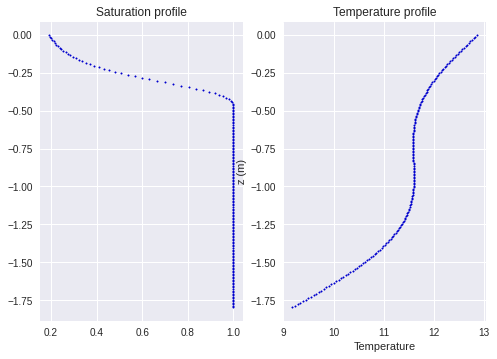

In [ ]:


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(saturation_profile_REF.sat,saturation_profile_REF.z, s=10, alpha=1, color='mediumblue',marker='.')
ax1.set_title('Saturation profile')
plt.xlabel('Saturation')
plt.ylabel('z (m)')
ax2.set_title('Temperature profile')
ax2.scatter(temperature_profile_REF.temp,temperature_profile_REF.z, s=10, alpha=1, color='mediumblue',marker='.')
plt.xlabel('Temperature')
plt.ylabel('z (m)')




#row_1=df.head(1)
df["s"] = ""
for index, row in df.iterrows():
# Initial conditions
    f_IC_bck=open("E_cdt_initiale_backup.dat","r")
    IC_model=f_IC_bck.read()
    IC_model=IC_model.replace('[head_ini]', '%05.2fD+00' % REF_WT)
## write the boundary conditions
    f_bc_bck=open("E_cdt_aux_limites_backup.dat", "r")
    bc_model=f_bc_bck.read()
    bc_model=bc_model.replace('[top]', '%08.2fD+00' % REF_WT)
    bc_model=bc_model.replace('[bot]','%08.2fD+00' % REF_WT)
    ########### Zone of parameters
    f_paramZ_bck=open("E_zone_parameter_backup.dat", "r")
    f_paramZ_new = open("E_zone_parameter.dat", 'w')
    f_bc_new = open("E_cdt_aux_limites.dat", 'w')
    f_IC_new=open("E_cdt_initiale.dat","w")
    param_zone=f_paramZ_bck.read()
   
#coord = pd.read_csv(f_coor, names=["id", "x", "z"], header=None, delim_whitespace=True)

# replace the parameter values
# If you wand add more parameters modify this section
    param_zone=param_zone.replace('[k1]','%8.2e' % val_k)
    param_zone=param_zone.replace('[n1]','%6.2f' % REF_n)
    param_zone=param_zone.replace('[r1]','%6.2f' % val_r)
    param_zone=param_zone.replace('[a1]','%8.2e' % row['a'])
    param_zone=param_zone.replace('[nVG1]','%6.2f' % row['nVG'])
    param_zone=param_zone.replace('[swres1]','%6.2f' % REF_swres)
    param_zone=param_zone.replace('[l1]','%6.2f' % row['l'])
    param_zone=param_zone.replace('[c1]','%6.2f' % REF_c)
    param_zone=param_zone.replace('[r1]','%6.2f' % REF_r)
    




#Write new ginette files
    f_IC_new.write(IC_model)
    f_paramZ_new.write(param_zone)
    f_bc_new.write(bc_model)

    
# close files    


    f_paramZ_new.close()
    f_paramZ_bck.close()

    f_IC_new.close()
    f_bc_bck.close()
    f_bc_new.close()



# run ginette
    subprocess.call(["./ginette"])
    
# read the saturation profil   
    saturation_profile = pd.read_table('S_saturation_profil_t.dat',delim_whitespace=True,header=None)
    saturation_profile.columns=[ "time",  "z","sat"]
    saturation_profile=saturation_profile.iloc[saturation_profile.index.stop-int(nb_cell):saturation_profile.index.stop]
    temperature_profile = pd.read_table('Sim_temperature_profil_t.dat',delim_whitespace=True,header=None)
    temperature_profile.columns=[ "time",  "z","temp"]
    temperature_profile=temperature_profile.iloc[temperature_profile.index.stop-int(nb_cell):temperature_profile.index.stop]
    #df["s"].at[index ] = rmse(saturation_profile['sat'],saturation_profile_REF['sat'],0.02)
    
    ax1.scatter(saturation_profile.sat,saturation_profile.z, s=10, alpha=1, color='red',marker='.')
    ax1.set_title('Saturation profile')
    plt.xlabel('Saturation')
    plt.ylabel('z (m)')
    ax2.set_title('Temperature profile')
    ax2.scatter(temperature_profile.temp,temperature_profile.z, s=10, alpha=1, color='red',marker='.')
    plt.xlabel('Temperature')
    plt.ylabel('z (m)')


plt.show()

In [ ]:
temperature_profile.temp

34380    12.853810
34381    12.821441
34382    12.789110
34383    12.756840
34384    12.724656
           ...    
34555     9.390893
34556     9.338173
34557     9.285344
34558     9.232438
34559     9.179484
Name: temp, Length: 180, dtype: float64